<a href="https://colab.research.google.com/github/mrchapagain/SocialNetworkAnalytics/blob/main/TwiteerDataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tweeter Data Analytics

***Here I will cover:***
1. *Tweet Streeming*
2. *Tweets from twetter user*
2. *Tweets # search by keywords*

***Libaries***

In [148]:
# Necessary libaries
from tweepy import OAuthHandler
from tweepy import API
import tweepy
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

***Tweepy authentication***

In [149]:
#read configs, #import configparser, #config= configparser.ConfigParser(), #config.read('/content/sample_data/config.ipynb')
#Necessary information form tweet account



auth = OAuthHandler(consumer_key, consumer_secret) # Consumer key authentication
auth.set_access_token(access_token, access_token_secret) # Access key authentication
api = API(auth)  # Set up the API with the authentication handler
api.me().screen_name  # just check if it is working

'mrchapagain'

#1.   Tweets streeming

***Function for scraping and updating data***

In [150]:
# Function to extact data from twetter user
def extract_timeline_as_df(timeline_list):
  columns = set()
  allowed_types = [str, int]
  tweets_data= []

  for status in timeline_list:
    status_dict= dict(vars(status))
    keys= status_dict.keys()

    single_tweet_data = {'user': status.user.screen_name, 'author': status.author.screen_name}
    
    for k in keys:
      try:
        v_type= type(status_dict[k])
      except:
        v_type = None
      
      if v_type != None:
        if v_type in allowed_types:
          single_tweet_data[k] = status_dict[k]
          columns.add(k) # these are the variable that can extracted data from

    tweets_data.append(single_tweet_data)

  header_cols= list(columns)
  header_cols.append('user')
  header_cols.append('author')
  df= pd.DataFrame(tweets_data, columns= header_cols)
  return df

***Getting actul data with the function difined earlier***

In [151]:
my_timeline= api.home_timeline()
df2= extract_timeline_as_df(my_timeline)
df2.head()

,retweet_count,quoted_status_id,favorite_count,source,source_url,text,id,quoted_status_id_str,id_str,lang,user,author
0,0,1.543033e+18,1,Twitter for Android,http://twitter.com/download/android,फाेहाेर बटुलबाटुल पार्टी! https://t.co/BsS0Us8uoS,1543034959338024960,1543033337295806464,1543034959338024960,ne,belakoboli,belakoboli
1,0,NaN,1,EUwatch,https://www.euwatch.live,Russia’s Ship of Lies: How a cargo of ‘stolen’...,1543034264136007680,NaN,1543034264136007680,en,EUwatchers,EUwatchers
2,1,NaN,0,EUwatch,https://www.euwatch.live,RT @AmplifyUkraine: – Держспецзв’язку\nhttps:/...,1543032462380515334,NaN,1543032462380515334,uk,EUwatchers,EUwatchers
3,1,NaN,0,EUwatch,https://www.euwatch.live,"RT @AmplifyUkraine: 😢 In Egypt, a shark attack...",1543032208981729280,NaN,1543032208981729280,und,EUwatchers,EUwatchers
4,2,NaN,0,EUwatch,https://www.euwatch.live,"RT @AmplifyUkraine: ""In the Odesa region, the ...",1543031955666739201,NaN,1543031955666739201,und,EUwatchers,EUwatchers


#2. Tweets from user

***Creating variable to navigate twetter***

In [152]:
# Obtaining tweet from specific user account
def tweets_by_user(user):
  limit=300

  tweets_obj= tweepy.Cursor(api.user_timeline, screen_name=user, count=200, tweet_mode="extended").items(limit)
  
  # Create Data Frame
  columns= ['Tweets', 'Likes', 'Time', 'User']
  tweets = []
  for i in tweets_obj:
    tweets.append([i.full_text, i.favorite_count, i.created_at, i.user.screen_name])

  df= pd.DataFrame(tweets, columns=columns)
  return df
  

In [153]:
df=tweets_by_user("DRNyheder")
df

,Tweets,Likes,Time,User
0,Ny frist for forhandlinger mellem SAS og pilot...,3,2022-07-01 23:42:03,DRNyheder
1,Pandemi-tømmermænd gjorde første halvår på akt...,4,2022-07-01 20:26:06,DRNyheder
2,ANALYSE Nu venter alle på De Radikale https://...,3,2022-07-01 18:56:06,DRNyheder
3,Seneste nyt fra Ukraine: Brite og marokkaner a...,4,2022-07-01 17:54:04,DRNyheder
4,Radikalt bagland presser partitop: Advokater s...,53,2022-07-01 16:34:06,DRNyheder
...,...,...,...,...
295,"Ingen grund til coronaalarm, selv om kontaktta...",1,2022-06-14 18:42:33,DRNyheder
296,To kvinder lægger sag an mod Mærsk for at vend...,22,2022-06-14 16:19:34,DRNyheder
297,"Overfaldsvideo går viralt i Kina: 'Mænd føler,...",1,2022-06-14 16:15:36,DRNyheder
298,Venstre: Kontanthjælpsaftale er løftebrud http...,4,2022-06-14 16:15:34,DRNyheder


***Loading them in Data Frame***

In [154]:
# save them as dataframe by passing variables as a columns
df= df[~df.Tweets.str.contains("RT")].reset_index(drop=True)
#now lets make only tweets thats has not Re-Tweeted!

df.head()

,Tweets,Likes,Time,User
0,Ny frist for forhandlinger mellem SAS og pilot...,3,2022-07-01 23:42:03,DRNyheder
1,Pandemi-tømmermænd gjorde første halvår på akt...,4,2022-07-01 20:26:06,DRNyheder
2,ANALYSE Nu venter alle på De Radikale https://...,3,2022-07-01 18:56:06,DRNyheder
3,Seneste nyt fra Ukraine: Brite og marokkaner a...,4,2022-07-01 17:54:04,DRNyheder
4,Radikalt bagland presser partitop: Advokater s...,53,2022-07-01 16:34:06,DRNyheder


In [155]:
# Top most liked tweets
mostlike= df.loc[df.Likes.nlargest(5).index].set_index("Tweets")
mostlike

,Likes,Time,User
Tweets,,,
Støttepartier tøver med at lade uvildige advokater vurdere minkrapport: 'Kan bedst betegnes som hykleri' https://t.co/Ry9EjxqRvm https://t.co/JAB32AD4Zn,89,2022-06-29 09:06:04,DRNyheder
"Inflationen brager løs - og Danmark er blandt de europæiske lande, der hjælper befolkningen mindst https://t.co/KOByf8Xc7k https://t.co/WzASaWeGfX",62,2022-06-19 04:57:06,DRNyheder
Uffe Ellemann-Jensen er død https://t.co/X7ddZjEuiR https://t.co/q7RDaXhT1W,54,2022-06-19 07:32:05,DRNyheder
Radikalt bagland presser partitop: Advokater skal vurdere om Mette Frederiksen skal for rigsret https://t.co/EUBhvTgKE1 https://t.co/2NjjCvg8YA,53,2022-07-01 16:34:06,DRNyheder
Seneste nyt fra Ukraine: Zelenskyj vil have Rusland ud af FN's Sikkerhedsråd https://t.co/rgKyeBaJIk https://t.co/mjdnFSXxji,51,2022-06-29 12:53:33,DRNyheder


#3.  Tweets using Keywords or Hashtag

In [200]:
# Obtaining tweet using keywords or Hastag
def tweets_by_keywords(keywords):
  limit=300

  tweets_obj= tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode="extended").items(limit)
    # Create Data Frame
  columns= ['Tweets', 'Time', 'User']
  tweets = []
  for i in tweets_obj:
    tweets.append([i.full_text, i.created_at, i.user.screen_name])

  df= pd.DataFrame(tweets, columns=columns)
  return df
  


In [201]:
tweets_by_keywords('Health')

,Tweets,Time,User
0,RT @placentadoc: An acting medical officer of ...,2022-07-02 01:19:09,DonSmallman
1,RT @FINEASXNOLA: I pray for nothing but Great ...,2022-07-02 01:19:08,AAMarketing9
2,RT @blackenterprise: MyOwnDoctor Announces Hea...,2022-07-02 01:19:08,iamCameka
3,RT @KameronHurley: Progressives always trip on...,2022-07-02 01:19:08,csmcg
4,@Urbonov @goblue34 @PondPrimate @realDailyWire...,2022-07-02 01:19:08,shendaki
...,...,...,...
295,"RT @mattbc: Please, I beg you, in the name of ...",2022-07-02 01:17:47,rhiannonisalosr
296,Time is Gold. Health is Wealth. Knowledge is P...,2022-07-02 01:17:47,cmrcuan
297,RT @GovCTW: The Supreme Court decision handed ...,2022-07-02 01:17:47,a_standal
298,RT @kirkmin: 29 years ago today I attempted su...,2022-07-02 01:17:47,jeje66


# Visualization with text processing

In [205]:
# Libaries for sentiment analytics (NLP)
import matplotlib.pyplot as plt
import re
import spacy
import seaborn as sns

In [210]:
import spacy.cli
spacy.cli.download("en_core_web_lg")
nlp = spacy.load('en_core_web_lg')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [211]:
# Split all the sentances and creat the list of sentence of from the tweet columns
list_of_sentences = [sentence for sentence in df.Tweets]

lines = []
for sentence in list_of_sentences:
  words = sentence.split()
  for w in words:
    lines.append(w)
print(lines[:20])

['Ny', 'frist', 'for', 'forhandlinger', 'mellem', 'SAS', 'og', 'piloterne', 'https://t.co/lOM2w7jDXc', 'https://t.co/gThBUT2wdO', 'Pandemi-tømmermænd', 'gjorde', 'første', 'halvår', 'på', 'aktiemarkedet', 'blodrødt:', 'Det', 'skal', 'nok']


In [212]:
# Removing Punctuation by using Regular Expression (RegEx)
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines2= []

for word in lines:
  if word != '':
    lines2.append(word)

In [213]:
# Stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language='english')

stem= []
for word in lines2:
  stem.append(s_stemmer.stem(word))

In [214]:
# Removing all the stop words
stem2= []

for word in stem:
  if word not in nlp.Defaults.stop_words:
    stem2.append(word)

In [215]:
df2 = pd.DataFrame(stem2)
df2 = df2[0].value_counts()
df2.head()

er     80
og     69
p      66
til    66
om     53
Name: 0, dtype: int64

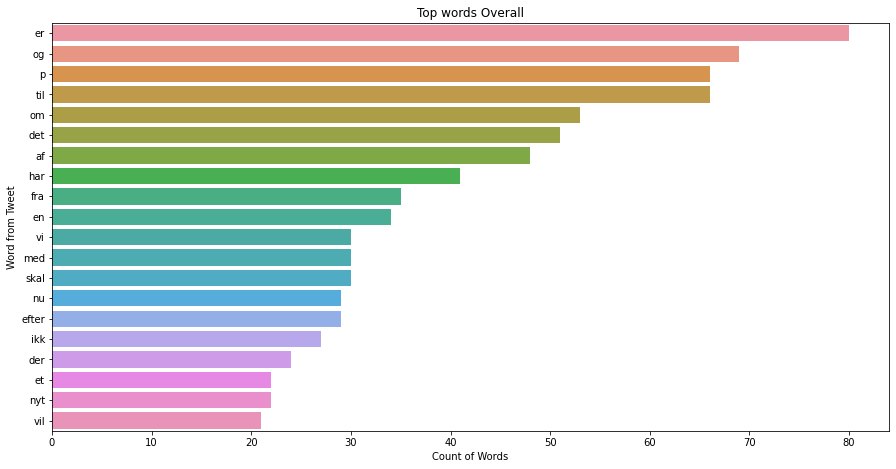

In [216]:
# Visualization
df2= df2[:20,]
plt.figure(figsize=(15,7.5))
sns.barplot(df2.values, df2.index, alpha=1)
plt.title('Top words Overall')
plt.ylabel('Word from Tweet')
plt.xlabel('Count of Words')
plt.show()

In [217]:
# Visualization for mentions organizations
def show_ents(doc):
  if doc.ents:
    for ent in doc.ents:
      print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [218]:
str1 = " "
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df6 = pd.DataFrame(label, columns = ['Word', 'Entity'])
df7 = df6.where(df6['Entity'] == 'ORG')
df7 = df7['Word'].value_counts()

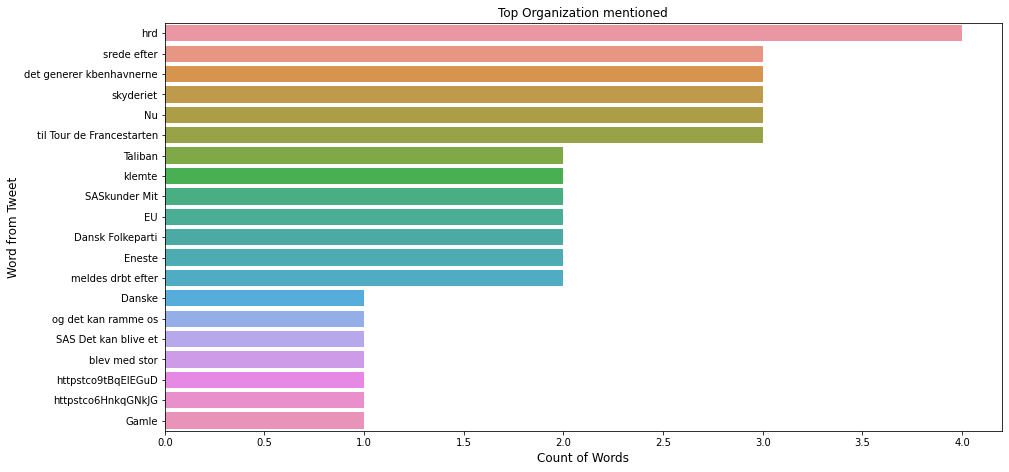

In [219]:
# Visualization again
dfx= df7[:20, ]
plt.figure(figsize=(15,7.5))
sns.barplot(dfx.values, dfx.index, alpha=1)
plt.title('Top Organization mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [220]:
str1 = " "
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df6 = pd.DataFrame(label, columns = ['Word', 'Entity'])
df7 = df6.where(df6['Entity'] == 'PERSON')
df7 = df7['Word'].value_counts()

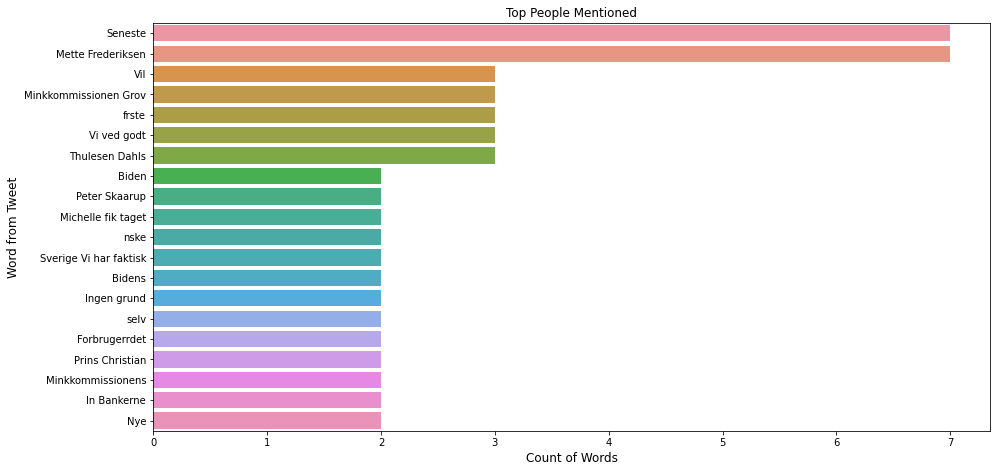

In [221]:
# Visualization again
dfx= df7[:20, ]
plt.figure(figsize=(15,7.5))
sns.barplot(dfx.values, dfx.index, alpha=1)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()